.. _nb_ref_dirs:

## Reference Directions

Most evolutionary many-objective optimization (EMaO) algorithms, for instance [NSGA3](../algorithms/nsga3.ipynb) or [MOEAD](../algorithms/moead.ipynb), start with a description of a number of predefined set of reference directions on a unit simplex. Reference directions in an $M$-dimensional space are subject to

$$
\sum_{i=1}^{M} w_i = 1
$$

$$
w_i \geq 0 \quad \forall i \in (1, ..., M)
$$




So far, most studies have used the Das and Dennis's structured approach <cite data-cite="das_dennis"></cite> for generating  well-spaced reference points. 
A reference direction is constructed by a vector originating from the origin and connected to each of them. The number of points on the unit simplex is determined by a parameter $p$ (we call it `n_partitions` in our implementation), which indicates the number of gaps between two consecutive points along an objective axis. It turns out that the total number of points ($n$) on the unit simplex is

$$
n = C_{p}^{\, M+p-1}
$$

For example, if $p=10$ is chosen for a three-objective problem ($M=3$), then the total number of points on the unit simplex is $C_{10}^{\, 3+10-1}=\binom{12}{10}$ or 66. These 66 points are well-spaced with an identical distance to their nearest neighbor on the unit simplex.
Due to the highly structured nature of the procedure, this method cannot produce an arbitrary number of points desired in an EMaO application. Moreover, in higher dimensional space, most points to not lie in the interior but on the boundaries. Both are demonstrated in the figure below.

<div style="display: block;margin-left: auto;margin-right: auto;width: 60%;">
![ref_dir_interior](../resources/images/ref_dir_interior.png)
</div>


Our framework offers a **novel** Riesz s-Energy <cite data-cite="ref_dirs"></cite> based method which can overcome the limitation of the Das and Dennis method and create a well-spaced point set for any arbitrary number of points and dimensions.
This method addresses the need of EMO research for a more generic approach to sample reference directions. 

[Riesz s-Energy](#Riesz-s-Energy) | 
[Uniform Sampling / Das-Dennis](#Das-Dennis) | 
[Multi-layer Approach](#Multi-layer-Approach)

### Riesz s-Energy



\begin{equation}
\newcommand{\boldz}{\mbox{${\textbf z}$}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\end{equation}

The motivation behind the use of an energy concept to obtain a well-spaced distribution comes from nature. Multi-body and interacting physical systems eventually settle on a state which corresponds to the minimum overall potential energy. For two bodies, the potential energy is proportional to the inverse of the distance between them. The minimum potential solution corresponds to a diverse distribution of multiple bodies in the three-dimensional physical space. 
While dealing with a many-dimensional ($s$) space, we use a generalization of potential energy called Riesz <cite data-cite="HARDIN2005174"></cite> which is defined between two points ($\boldz^{(i)}$ and $\boldz^{(j)}$) as

\begin{equation}
U(\boldz^{(i)},\boldz^{(j)}) = \frac{1}{\norm{{\bf z}^{(i)} - {\bf z}^{(j)}}^s}.
\end{equation}

In our context, it is not clear how the dimension $s$ should depend on the number of objectives ($M$), but some trial-and-error studies (shown in the Supplementary document) motivated us to set $s=M^2$ for all simulations here. For multiple ($n$) points, the overall s-Energy can be written as follows:

\begin{equation}
U_T(\boldz) = \frac{1}{2}\sum_{i = 1}^{n}\sum_{j = 1 \atop j \neq i}^{n} \frac{1}{\norm{{\bf z}^{(i)} - {\bf z}^{(j)}}^s}, \quad {\bf z} \in \mathbb{R}^{n\times M}.
\end{equation}

The concept for our energy method is to find the $\boldz$-matrix of size $n\times M$ which minimizes $U_T$ subject to every $\boldz^{(i)}$ vector to lie on the unit simplex, that is, $\sum_{m=1}^M z_m^{(i)}=1$. We employ a gradient-based optimization method (Adam~\cite{adam}) here. Due to very large magnitude of $U_T$, we take a logarithm of $U_T$ and then compute the partial derivative of $F_E=\log U_T$ with respect to $z_m^{(i)}$, as follows:

\begin{equation}
\begin{aligned}
\frac{\partial F_E}{\partial z^{(i)}_m} &= -\frac{d}{U_T} \left[\sum_{j=1, \atop j \neq i}^{n}\frac{\left(z^{(i)}_m - z^{(j)}_m\right)}{\norm{{\bf z}^{(i)} - {\bf z}^{(j)}}^{s + 2}} \right].
\end{aligned}
\end{equation}

To make sure all points stay on the unit simplex, gradients are projected onto the unit simplex. 



The proposed s-Energy method is exclusively available in our framework and was the outcome of a research project in our laboratory. We are driven by providing our newest algorithms and methods to other researchers.
If you use our method to create reference directions, please cite our method as:

```
@ARTICLE{ref_dirs_energy,
    author={J. {Blank} and K. {Deb} and Y. {Dhebar} and S. {Bandaru} and H. {Seada}},
    journal={IEEE Transactions on Evolutionary Computation},
    title={Generating Well-Spaced Points on a Unit Simplex for Evolutionary Many-Objective Optimization},
    year={In press},
    volume={},
    number={},
    pages={}
}
```

Some examples are provided below:

In [1]:
from pymoo.factory import get_visualization, get_reference_directions
from pymoo.util.ref_dirs.energy import RieszEnergyReferenceDirectionFactory

ref_dirs = get_reference_directions("energy", 3, 90, seed=1)
get_visualization("scatter").add(ref_dirs).show()

In [2]:
ref_dirs = get_reference_directions("energy", 3, 250, seed=1)
get_visualization("scatter").add(ref_dirs).show()

### Das-Dennis

As mentioned in the introduction, the Das-Dennis method can be used to create reference directions in a very structured way. 
However, the method relies on a partition number `n_partitions` which determines how many points will be sampled.
Points can be uniformly create on the unit simplex using the Das-Dennis method proposed in <cite data-cite="das_dennis"></cite>.

In [3]:
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
get_visualization("scatter").add(ref_dirs).show()

By carefully observing the figure above, one can see that along one axis, exactly 12 partitions (which results in 13 points, including the corners) exist. However, this implies that when the dimensionality increases, more points will be sampled a) on the boundaries and b) on the overall simplex. 

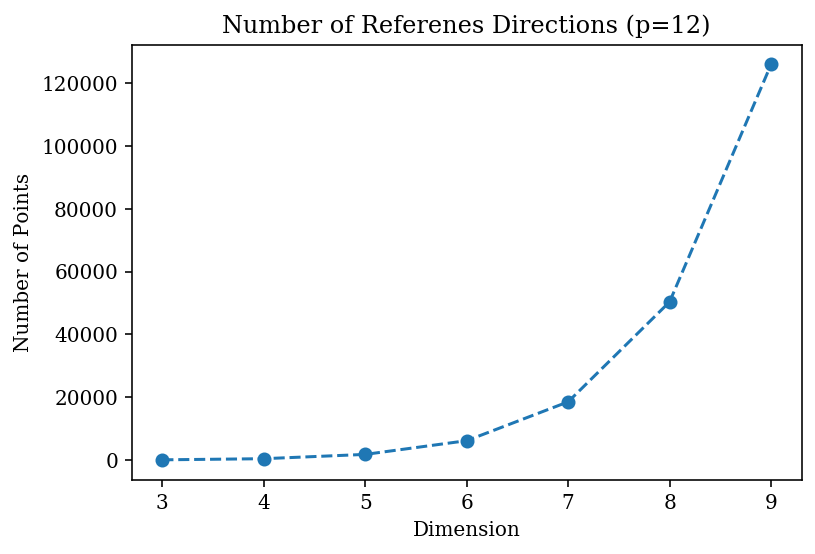

In [4]:
import matplotlib.pyplot as plt

n_dim = range(3,10)
n_points = [len(get_reference_directions("das-dennis", d, n_partitions=12)) for d in n_dim]

plt.plot(n_dim, n_points, '--o')
plt.title("Number of Referenes Directions (p=12)")
plt.ylabel("Number of Points")
plt.xlabel("Dimension")
plt.show()

One can argue that decreasing the partition number might be a solution to address the exploding number of points in higher dimensions. However, please keep in mind that only very few points might lie in the simplex interior. Calculations reveal that, when $p<M$, there is no interior point, and when $p=M$, there is exactly one interior point, irrespective of the size of $M$. With $p>M$  points begin to appear in the interior, but the number of such interior points is $n_I = {{p-1}\choose{p-M}}$, which is only a tiny fraction
\begin{equation}
\rho_I = \frac{n_I}{n} = \frac{p! \, (p-1)!}{(p-M)! \, (M+p-1)!}
\end{equation}
of all $n$ Das and Dennis points.

Some researchers have used the idea of creating multiple layers of such Das-Dennis points to overcome this issue.

### Multi-layer Approach

This approach uses the idea of scaling different simplices. This requires the user to define different layers, including the dimensionality `n_dim`, the partition number `n_partitions`, and the corresponding scaling `scaling`.
For instance, for three dimensions, a bias towards the center can be achieved as follows:

In [5]:
ref_dirs = get_reference_directions(
    "multi-layer",
    get_reference_directions("das-dennis", 3, n_partitions=12, scaling=1.0),
    get_reference_directions("das-dennis", 3, n_partitions=12, scaling=0.5)
)

get_visualization("scatter").add(ref_dirs).show()

In order to factor reference directions on an eight-dimensional unit simplex we can do the following:

In [6]:
ref_dirs = get_reference_directions(
    "multi-layer",
    get_reference_directions("das-dennis", 8, n_partitions=3, scaling=1.0),
    get_reference_directions("das-dennis", 8, n_partitions=2, scaling=0.5),
)

get_visualization("pcp").add(ref_dirs).show()

A more generic approach that does **NOT** need any scalings to be provided by the user is to use the **Riesz s-Energy** method to optimize not the reference directions directly but the scalings.

In [7]:
partitions = [3, 2, 1, 1]

ref_dirs = get_reference_directions("layer-energy", 8, partitions)
get_visualization("pcp").add(ref_dirs).show()

The `LayerwiseRieszEnergyReferenceDirectionFactory` can be used to retrieve the optimized partitions instead of the convenience method.

In [8]:
from pymoo.util.ref_dirs.energy_layer import LayerwiseRieszEnergyReferenceDirectionFactory

fac = LayerwiseRieszEnergyReferenceDirectionFactory(8, partitions)
ref_dirs = fac.do()

list(fac.scalings)

[1.0, 0.8480631388253735, 0.6542126980619762, 0.3805165848046697]

In [9]:
ref_dirs = get_reference_directions("layer-energy", 3, [9, 5, 2, 1])
get_visualization("scatter").add(ref_dirs).show()